# EDA Car Data Set

**We will explore the Car Data set and perform the exploratory data analysis on the dataset. The major topics to be covered are below:**

- **Removing duplicates**
- **Missing value treatment**
- **Outlier Treatment**
- **Normalization and Scaling( Numerical Variables)**
- **Encoding Categorical variables( Dummy Variables)**
- **Univerate Analysis**
- **Bivariate Analysis**

**As a first step, we will import all the necessary libraries that we think we will requiring to perform the EDA.**

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading the data set

**We will  be loading the EDA cars excel file using pandas. For this we will be using read_excel file.**

In [231]:
df=pd.read_excel('EDA Cars.xlsx')

# Basic Data Exploration 

**In this step, we will perform the below operations to check what the data set comprises of. We will check the below things:**

- **head of the dataset**
- **shape of the dataset**
- **info of the dataset**
- **summary of the dataset**

In [232]:
df.head()

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
0,1,125301.24250,No,F,Bachelors,Blue Collar,45.703013,Commercial,17430.0,Sports Car,7.0,Texas,42420.0
1,2,50815.44531,No,M,High School,NaN,20.591628,Private,18930.0,Minivan,1.0,Texas,42420.0
2,3,62977.82416,NaN,F,Bachelors,Clerical,33.639949,Private,NaN,SUV,1.0,Texas,42420.0
3,4,77099.96624,No,F,NaN,Lawyer,15.415676,NaN,18300.0,Sports Car,11.0,Texas,42420.0
4,5,130794.57420,No,M,High School,NaN,NaN,Commercial,28340.0,Panel Truck,10.0,Texas,42420.0


**head function will tell you the top records in the data set. By default python shows you only top 5 records.**

In [233]:
df.shape

(303, 13)

**Shape attribute tells us number of observations and variables we have in the data set. It is used to check the dimension of data. The cars data set has 303 observations and 13 variables in the data set.**

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   INDEX           303 non-null    int64  
 1   INCOME          260 non-null    float64
 2   MARITAL STATUS  275 non-null    object 
 3   SEX             297 non-null    object 
 4   EDUCATION       259 non-null    object 
 5   JOB             257 non-null    object 
 6   TRAVEL TIME     262 non-null    float64
 7   USE             250 non-null    object 
 8   MILES CLOCKED   278 non-null    float64
 9   CAR TYPE        293 non-null    object 
 10  CAR AGE         283 non-null    float64
 11  CITY            297 non-null    object 
 12  POSTAL CODE     300 non-null    float64
dtypes: float64(5), int64(1), object(7)
memory usage: 30.9+ KB


In [235]:
 # Converting Postel Code into Category 
df['POSTAL CODE'] = df['POSTAL CODE'].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   INDEX           303 non-null    int64  
 1   INCOME          260 non-null    float64
 2   MARITAL STATUS  275 non-null    object 
 3   SEX             297 non-null    object 
 4   EDUCATION       259 non-null    object 
 5   JOB             257 non-null    object 
 6   TRAVEL TIME     262 non-null    float64
 7   USE             250 non-null    object 
 8   MILES CLOCKED   278 non-null    float64
 9   CAR TYPE        293 non-null    object 
 10  CAR AGE         283 non-null    float64
 11  CITY            297 non-null    object 
 12  POSTAL CODE     300 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 30.9+ KB


In [236]:
df['POSTAL CODE'] = pd.Categorical(df['POSTAL CODE'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   INDEX           303 non-null    int64   
 1   INCOME          260 non-null    float64 
 2   MARITAL STATUS  275 non-null    object  
 3   SEX             297 non-null    object  
 4   EDUCATION       259 non-null    object  
 5   JOB             257 non-null    object  
 6   TRAVEL TIME     262 non-null    float64 
 7   USE             250 non-null    object  
 8   MILES CLOCKED   278 non-null    float64 
 9   CAR TYPE        293 non-null    object  
 10  CAR AGE         283 non-null    float64 
 11  CITY            297 non-null    object  
 12  POSTAL CODE     300 non-null    category
dtypes: category(1), float64(4), int64(1), object(7)
memory usage: 29.2+ KB


**info() is used to check the Information about the data and the datatypes of each respective attributes.**

In [237]:
df.describe()

,INDEX,INCOME,TRAVEL TIME,MILES CLOCKED,CAR AGE
count,303.000000,260.000000,262.000000,278.000000,283.000000
mean,139.640264,50025.162170,34.282098,13591.978417,6.265018
std,85.178422,41186.807914,14.910178,7167.328655,5.111218
min,1.000000,0.000000,5.000000,1500.000000,1.000000
25%,62.500000,20452.885022,24.449874,7900.000000,1.000000
50%,138.000000,44571.590870,33.564757,12065.000000,6.000000
75%,213.500000,66485.761387,43.907339,18240.000000,10.000000
max,289.000000,204667.589700,83.617643,38000.000000,20.000000


**The describe method will help to see how data has been spread for the numerical values. We can clearly see the minimum value, mean values, different percentile values and maximum values.**

# Check for Duplicate records

In [238]:
# Check for duplicate data

dups = df.duplicated().sum()
dups


14

In [239]:
dups = df.duplicated()
df[dups]

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
69,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
70,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
71,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
72,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
73,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
74,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
75,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
76,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
77,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
78,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0


**Since we have 14 duplicate records in the data, we will remove this from the data set so that we get only distinct records.**

In [240]:
dups = df.drop_duplicates(inplace = True)

**Post removing the duplicate, we will check whether the duplicates has been removed from the data set or not.**

In [242]:
# Check for duplicate data

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 0


,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE


**Now, we can  clearly see that there are no duplicate records in the data set. We can also quickly confirm the number of records by using the shape attribute as those 14 records should be removed from the original data. Initially it had 303 records now it should have 289**

In [243]:
df.shape

(289, 13)

# Outlier Treatment

**To check for outliers, we will be plotting the box plots.**

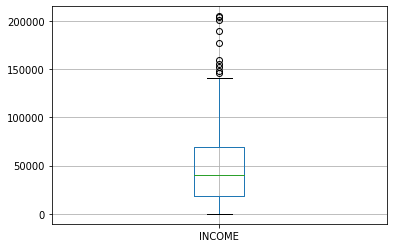

In [244]:
df.boxplot(column=['INCOME'])
plt.show()

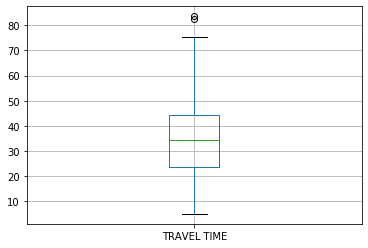

In [245]:
df.boxplot(column=['TRAVEL TIME'])
plt.show()

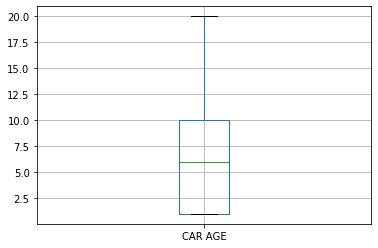

In [246]:
df.boxplot(column=['CAR AGE'])
plt.show()

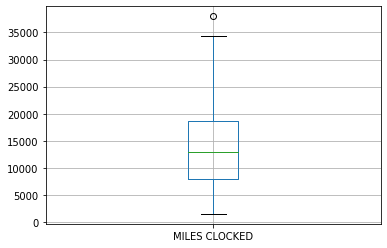

In [247]:
df.boxplot(column=['MILES CLOCKED'])
plt.show()

**Looking at the box plot, it seems that the three variables INCOME, MILES CLOCKED and TRAVEL TIME have outlier present in the variables.**

**These outliers value needs to be teated and there are several ways of treating them:**
    
- **Drop the outlier value**
- **Replace the outlier value using the IQR**



**Created a user definded function for finding the lower and upper range for a variable so that outlier can be treated.**

In [257]:
def remove_outliers(column):
    sorted(column)
    Q1, Q3 = np.percentile(column, [25,75])
    IQR = Q3-Q1
    lowerrange = Q1 - (1.5 * IQR)
    upperrange = Q3 + (1.5 * IQR)
    return lowerrange, upperrange
remove_outliers

<function __main__.remove_outliers(column)>

In [258]:
lrincome, urincome = remove_outliers(df['INCOME'])
df['INCOME'] = np.where(df['INCOME'] > urincome, urincome, df['INCOME'])


In [259]:
lrtt, urtt = remove_outliers(df['TRAVEL TIME'])
df['TRAVEL TIME'] = np.where(df['TRAVEL TIME'] > urtt, urtt, df['TRAVEL TIME'])

In [260]:
lrmc, urmc = remove_outliers(df['MILES CLOCKED'])
df['MILES CLOCKED'] = np.where(df['MILES CLOCKED'] > urmc, urmc, df['MILES CLOCKED'])

In [261]:
df.shape

(289, 13)

##  Make Boxplots after Outlier Treatment

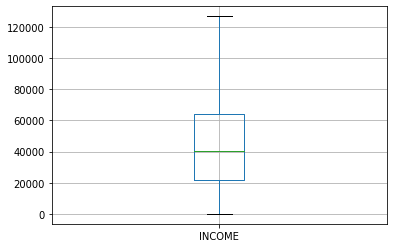

In [262]:
df.boxplot(column=['INCOME'])
plt.show()

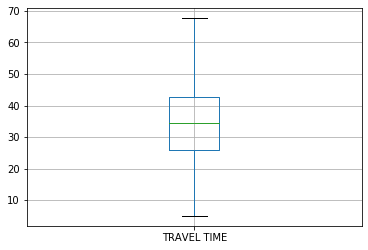

In [263]:
df.boxplot(column=['TRAVEL TIME'])
plt.show()

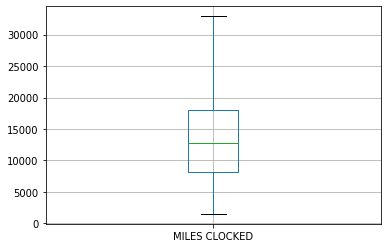

In [264]:
df.boxplot(column=['MILES CLOCKED'])
plt.show()

**If you look at the box plots above,post treating the outlier there are no outliers in all these columns.**

# Check for missing value

In [249]:
# Check for missing value in any column
df.isnull().sum()

INDEX              0
INCOME            43
MARITAL STATUS    28
SEX                6
EDUCATION         44
JOB               46
TRAVEL TIME       41
USE               53
MILES CLOCKED     25
CAR TYPE          10
CAR AGE           20
CITY               6
POSTAL CODE        3
dtype: int64

**We can see that we have various missing values in respective columns. There are various ways of treating your missing values in the data set. And which technique to use when is actually dependent on the type of data you are dealing with.**

- **Drop the missing values : In this case we drop the missing values from those variables. In case there are very few missing values you can drop those values.**

- **Impute with mean value : For numerical column, you can replace the missing values with mean values. Before replacing with mean value, it is advisable to check that the variable shouldn't have extreme values .i.e. outliers.**

- **Impute with median value : For numerical column, you can also replace the missing values with median values. In case you have extreme values such as outliers it is advisable to use median approach.**

- **Impute with mode value : For categorical column, you can replace the missing values with mode values i.e the frequent ones.**

**In this exercise, we will replace the numerical columns with median values and for categorical columns we will replace the missing values with mode values.**

In [250]:
df[df.isnull().sum()[df.isnull().sum()>0].index].dtypes

INCOME             float64
MARITAL STATUS      object
SEX                 object
EDUCATION           object
JOB                 object
TRAVEL TIME        float64
USE                 object
MILES CLOCKED      float64
CAR TYPE            object
CAR AGE            float64
CITY                object
POSTAL CODE       category
dtype: object

**Replacing NULL values in Numerical Columns using Median**

In [251]:
med1 = df['INCOME'].median()
med2 = df['TRAVEL TIME'].median()
med3 = df['MILES CLOCKED'].median()

In [252]:
df['INCOME'].replace(np.nan, med1, inplace = True)
df['TRAVEL TIME'].replace(np.nan, med2, inplace = True)
df['MILES CLOCKED'].replace(np.nan, med3, inplace = True)

**Replacing NULL values in Categorical Columns using Mode**

In [253]:
mode1 = df['POSTAL CODE'].mode()
mode2 = df['MARITAL STATUS'].mode()
mode3 = df['SEX'].mode()
mode4 = df['EDUCATION'].mode()
mode5 = df['USE'].mode()
mode6 = df['CAR TYPE'].mode()
mode7 = df['CITY'].mode()

In [254]:
df['POSTAL CODE'].fillna(df['POSTAL CODE'].mode()[0], inplace = True)
df['MARITAL STATUS'].fillna(df['MARITAL STATUS'].mode()[0],  inplace = True)
df['SEX'].fillna(df['SEX'].mode()[0],  inplace = True)
df['EDUCATION'].fillna(df['EDUCATION'].mode()[0], inplace = True)
df['USE'].fillna(df['USE'].mode()[0], inplace = True)
df['CAR TYPE'].fillna(df['CAR TYPE'].mode()[0], inplace = True)
df['CITY'].fillna(df['CITY'].mode()[0], inplace = True)

In [255]:
# Check for missing value in any column
df.isnull().sum()

INDEX              0
INCOME             0
MARITAL STATUS     0
SEX                0
EDUCATION          0
JOB               46
TRAVEL TIME        0
USE                0
MILES CLOCKED      0
CAR TYPE           0
CAR AGE           20
CITY               0
POSTAL CODE        0
dtype: int64

# Univariate Analysis

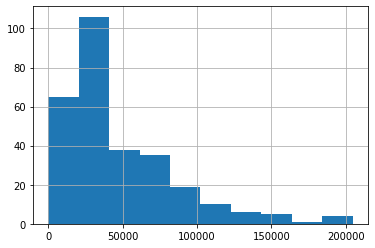

In [256]:
  # histogram of income
df['INCOME'].hist()

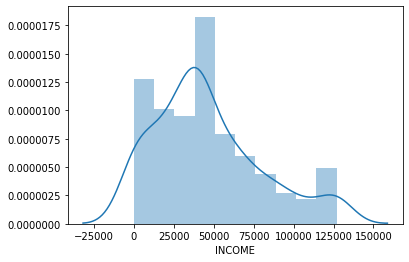

In [174]:
sns.distplot(df['INCOME'])

From above figure, we can say that the Income parameter is right skewed

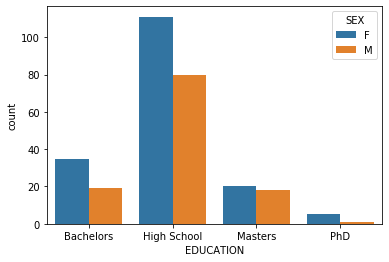

In [175]:
sns.countplot(df["EDUCATION"],hue=df["SEX"])   #countplot for Education wrt SEX

From the above graph we can interpret that majority of the people are High School passouts and this is true for both Males and Females

# Bivariate Analysis

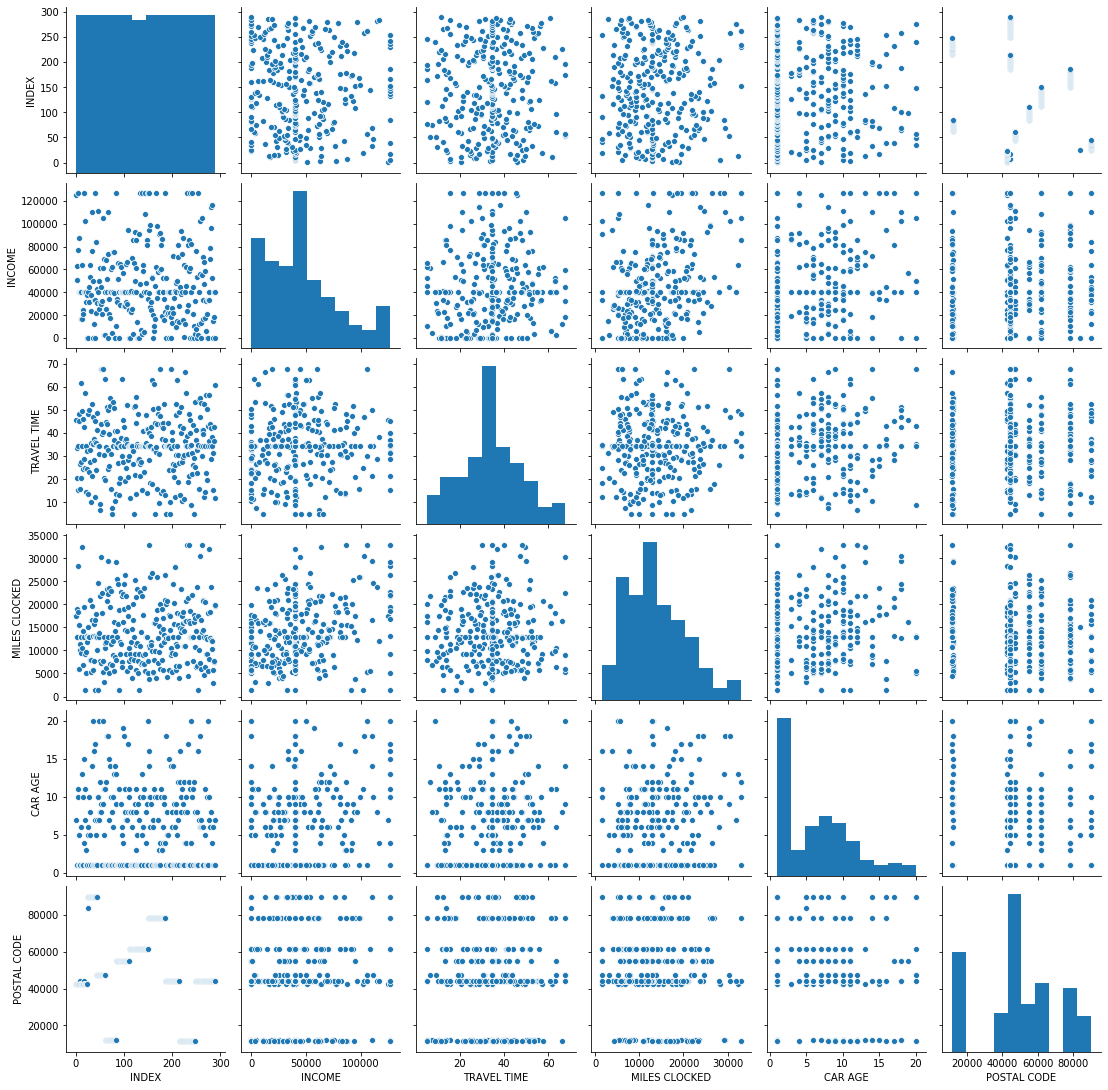

In [177]:
#Pairplot of all variables
sns.pairplot(data = df)

**In the above plot scatter diagrams are plotted for all the numerical columns in the dataset. A scatter plot is a visual representation of the degree of correlation between any two columns. The pair plot function in seaborn makes it very easy to generate joint scatter plots for all the columns in the data.**

In [179]:
corr = df.corr()
corr

,INDEX,INCOME,TRAVEL TIME,MILES CLOCKED,CAR AGE
INDEX,1.000000,-0.041232,0.022397,0.038455,-0.026976
INCOME,-0.041232,1.000000,0.061243,0.340653,0.278835
TRAVEL TIME,0.022397,0.061243,1.000000,0.023395,0.149627
MILES CLOCKED,0.038455,0.340653,0.023395,1.000000,0.134585
CAR AGE,-0.026976,0.278835,0.149627,0.134585,1.000000


## Correlation Heatmap

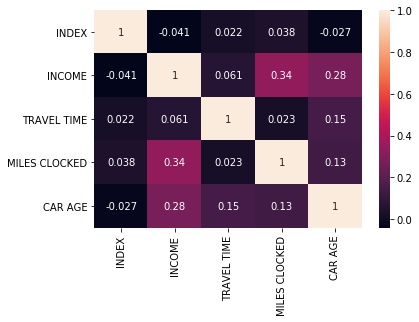

In [183]:
sns.heatmap(corr, annot=True)

# Normalizing and Scaling

**Often the variables of the data set are of different scales i.e. one variable is in millions and other in only 100. For e.g. in our data set Income is having values in thousands and age in just two digits. Since the data in these variables are of different scales, it is tough to compare these variables.**

**Feature scaling (also known as data normalization) is the method used to standardize the range of features of data. Since, the range of values of data may vary widely, it becomes a necessary step in data preprocessing while using machine learning algorithms.**

**In this method, we convert variables with different scales of measurements into a single scale.**

**StandardScaler normalizes the data using the formula (x-mean)/standard deviation.**

**We will be doing this only for the numerical variables.**

In [265]:
#Scales the data. Essentially returns the z-scores of every attribute

from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler()
std_scale 

StandardScaler(copy=True, with_mean=True, with_std=True)

In [266]:
df['INCOME'] = std_scale.fit_transform(df[['INCOME']])
df['TRAVEL TIME'] = std_scale.fit_transform(df[['TRAVEL TIME']])
df['MILES CLOCKED'] = std_scale.fit_transform(df[['MILES CLOCKED']])
df['CAR AGE'] = std_scale.fit_transform(df[['CAR AGE']])

In [267]:
df.head()

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
0,1,2.344391,No,F,Bachelors,Blue Collar,0.832200,Commercial,0.535034,Sports Car,0.128069,Texas,42420.0
1,2,0.139393,No,M,High School,NaN,-0.991124,Private,0.754768,Minivan,-1.020281,Texas,42420.0
2,3,0.499435,No,F,Bachelors,Clerical,-0.043693,Private,-0.136620,SUV,-1.020281,Texas,42420.0
3,4,0.917492,No,F,High School,Lawyer,-1.366947,Private,0.662480,Sports Car,0.893635,Texas,42420.0
4,5,2.391357,No,M,High School,NaN,0.013415,Commercial,2.133234,Panel Truck,0.702244,Texas,42420.0


**If you look at the variables INCOME, TRAVEL TIME and CAR AGE, all has been normalized and scaled in one scale now.**

# ENCODING

**One-Hot-Encoding is used to create dummy variables to replace the categories in a categorical variable into features of each category and represent it using 1 or 0 based on the presence or absence of the categorical value in the record.**

**This is required to do since the machine learning algorithms only works on the numerical data. That is why there is a need to convert the categorical column into numerical one.**

**get_dummies is the method which creates dummy variable for each categorical variable.**

**It is considered a good practice to set parameter `drop_first` as `True` whenever get_dummies is used. It reduces the chances of multicollinearity which will be covered in coming courses and the number of features are also less as compared to `drop_first=False`**

In [268]:
dummies = pd.get_dummies(df[["MARITAL STATUS","SEX","EDUCATION","JOB","USE","CAR TYPE","CITY"]],columns = ["MARITAL STATUS", "SEX","EDUCATION","JOB","USE","CAR TYPE","CITY"],prefix = ["ms","s","ed","j","u","ct","c"])

In [269]:
columns=["MARITAL STATUS", "SEX","EDUCATION","JOB","USE","CAR TYPE","CITY"]
df = pd.concat([df, dummies], axis=1)

# drop original column "fuel-type" from "df"
df.drop(columns, axis = 1, inplace = True )

In [270]:
df.head()

,INDEX,INCOME,TRAVEL TIME,MILES CLOCKED,CAR AGE,POSTAL CODE,ms_No,ms_Yes,s_F,s_M,...,c_Houston,c_Las Vegas,c_Los Angeles,c_New Albany,c_New York City,c_Philadelphia,c_San Francisco,c_Seattle,c_Texas,c_Washington
0,1,2.344391,0.832200,0.535034,0.128069,42420.0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,2,0.139393,-0.991124,0.754768,-1.020281,42420.0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,3,0.499435,-0.043693,-0.136620,-1.020281,42420.0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,4,0.917492,-1.366947,0.662480,0.893635,42420.0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,5,2.391357,0.013415,2.133234,0.702244,42420.0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0


**In the data set, each Category in all of the categorical columns have been added as columns with values 0 and 1**
**Example: married_Yes, sex_M, Education_High School
**If sex_M =1, then it means its a Male and sex_M=0 means its a Female**